# Лаба 5_2

In [58]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import time

In [13]:
df = pd.read_csv('diabetes.csv')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
488,4,99,72,17,0,25.6,0.294,28,0
75,1,0,48,20,0,24.7,0.140,22,0
583,8,100,76,0,0,38.7,0.190,42,0
327,10,179,70,0,0,35.1,0.200,37,0
416,1,97,68,21,0,27.2,1.095,22,0
510,12,84,72,31,0,29.7,0.297,46,1
392,1,131,64,14,415,23.7,0.389,21,0
527,3,116,74,15,105,26.3,0.107,24,0
760,2,88,58,26,16,28.4,0.766,22,0
689,1,144,82,46,180,46.1,0.335,46,1


In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
max_depths = range(1, 21)
train_acc = []
test_acc = []

for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

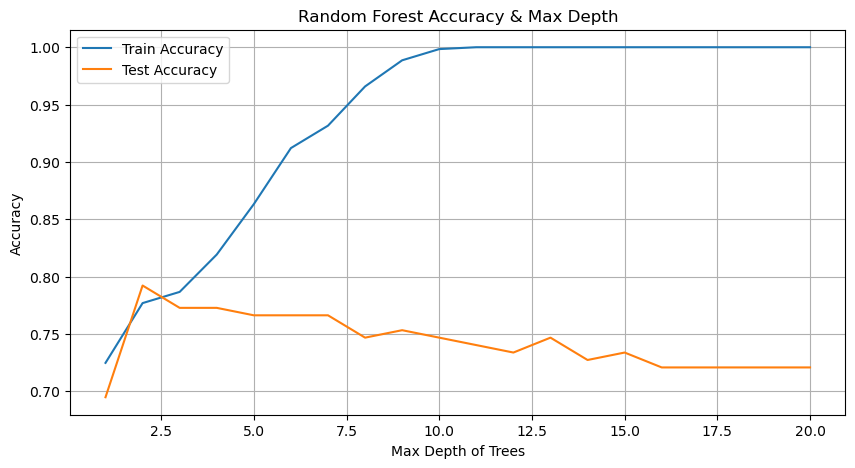

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_acc, label='Train Accuracy')
plt.plot(max_depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy & Max Depth')
plt.legend()
plt.grid()
plt.show()

In [25]:
max_features = range(1, X.shape[1] + 1)
train_acc = []
test_acc = []

for features in max_features:
    rf = RandomForestClassifier(max_features=features, random_state=42)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

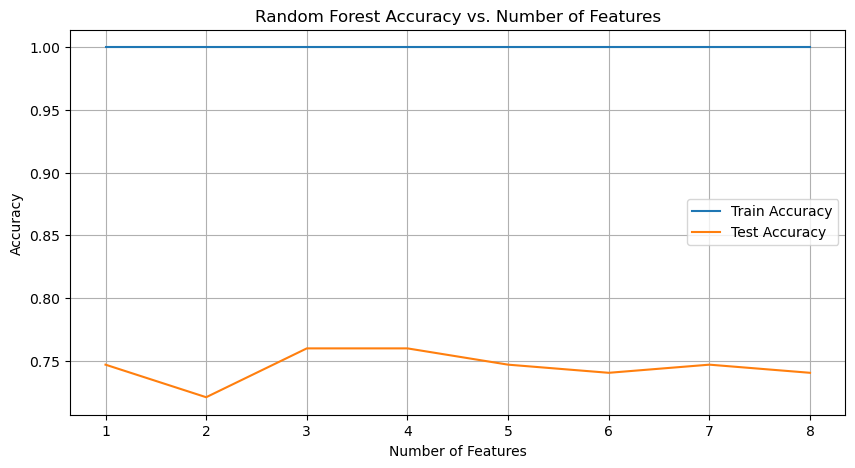

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(max_features, train_acc, label='Train Accuracy')
plt.plot(max_features, test_acc, label='Test Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Features')
plt.xticks(max_features)
plt.legend()
plt.grid()
plt.show()

In [52]:
n_estimators = [1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300]
train_acc = []
test_acc = []
times = []

for n in n_estimators:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    times.append(time.time() - start_time)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

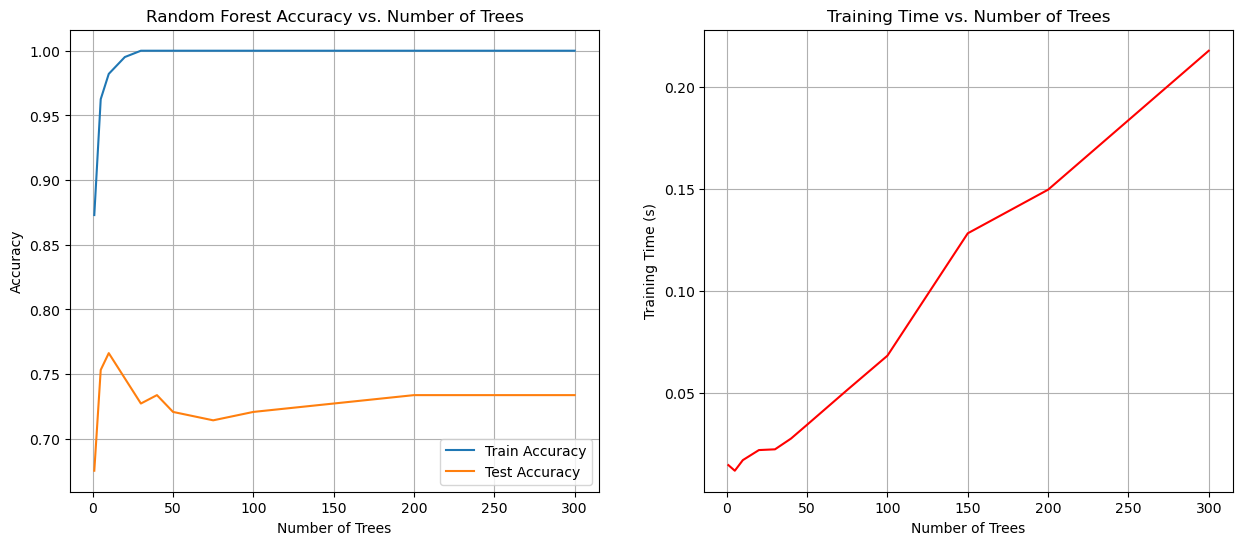

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(n_estimators, train_acc, label='Train Accuracy')
ax1.plot(n_estimators, test_acc, label='Test Accuracy')
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Accuracy')
ax1.set_title('Random Forest Accuracy vs. Number of Trees')
ax1.legend()
ax1.grid()

ax2.plot(n_estimators, times, 'r-')
ax2.set_xlabel('Number of Trees')
ax2.set_ylabel('Training Time (s)')
ax2.set_title('Training Time vs. Number of Trees')
ax2.grid()

plt.show()

In [78]:
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42
}

In [64]:
start_time = time.time()
xgb = XGBClassifier(**params)
xgb.fit(X_train, y_train)
xgb_time = time.time() - start_time

In [66]:
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

In [70]:
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)

print(f"Training Accuracy: {xgb_train_acc:.4f}")
print(f"Test Accuracy: {xgb_test_acc:.4f}")
print(f"Training Time: {xgb_time:.4f} seconds")

Training Accuracy: 0.9121
Test Accuracy: 0.7597
Training Time: 0.0504 seconds


In [72]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=42)
rf.fit(X_train, y_train)
rf_test_pred = rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

In [74]:
print(f"\nRandom Forest Test Accuracy: {rf_test_acc:.4f}")


Random Forest Test Accuracy: 0.7532
